# Setup

In [21]:
require 'torch'
require 'nn'
require 'nngraph'
nngraph.setDebug(false)
-- load custom modules
require 'load'
require 'Sampler'
sampler = nn.Sampler()

In [9]:
-- get data
data = loadmnist()
train = data.train
masked_train = train:clone()
masked_train[{{},{1,392}}] = 0

In [10]:
-- load saved model
saved = torch.load('save/CVAE_z2.t7')
model = saved.model
prior = saved.prior
encoder = saved.encoder
decoder = saved.decoder

# Image Reconstruction

In [17]:
N = 10
indices = torch.randperm(train:size(1)):long():split(N)
v = indices[1]

In [18]:
x_input = masked_train:index(1, v)
y_input = train:index(1, v)
pmu, plogv, mu, logv, recon = unpack(model:forward({x_input, y_input}))

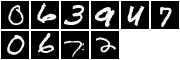

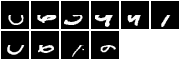

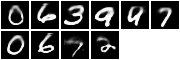

In [19]:
-- original image
itorch.image(y_input:reshape(N, 1, 28, 28))
-- masked image
itorch.image(x_input:reshape(N, 1, 28, 28))
-- reconstructed image
itorch.image(recon:reshape(N, 1, 28, 28))

# Conditional Sampling

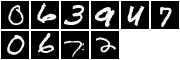

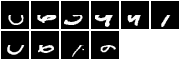

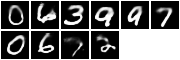

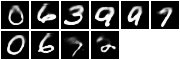

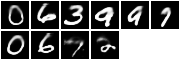

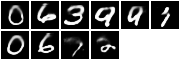

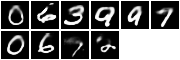

In [41]:
-- original image
itorch.image(y_input:reshape(N, 1, 28, 28))
-- masked image
itorch.image(x_input:reshape(N, 1, 28, 28))

-- sampled image
pmu, plogv = unpack(prior:forward(x_input))
code = sampler:forward({pmu, plogv})
recon = decoder:forward({x_input, code})
itorch.image(recon:reshape(N, 1, 28, 28))

-- sampled image
pmu, plogv = unpack(prior:forward(x_input))
code = sampler:forward({pmu, plogv})
recon = decoder:forward({x_input, code})
itorch.image(recon:reshape(N, 1, 28, 28))

-- sampled image
pmu, plogv = unpack(prior:forward(x_input))
code = sampler:forward({pmu, plogv})
recon = decoder:forward({x_input, code})
itorch.image(recon:reshape(N, 1, 28, 28))

-- sampled image
pmu, plogv = unpack(prior:forward(x_input))
code = sampler:forward({pmu, plogv})
recon = decoder:forward({x_input, code})
itorch.image(recon:reshape(N, 1, 28, 28))

-- sampled image
pmu, plogv = unpack(prior:forward(x_input))
code = sampler:forward({pmu, plogv})
recon = decoder:forward({x_input, code})
itorch.image(recon:reshape(N, 1, 28, 28))